In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import os
# Creating K-means Cluster Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Visualize the elbow
from yellowbrick.cluster import KElbowVisualizer
# show multiple outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
baseline = pd.read_csv("/Users/beatriceli/Documents/PhD_Research/GitHub/well-being/cleaned-surveys/Baseline.csv",parse_dates=["StartDate","EndDate",'Q2'])
baseline = baseline.drop(['StartDate','EndDate','Duration (in seconds)','RecordedDate'], axis=1)

baseline.head()

,Q2,Q3,Q4,Q5,Q6,Q7,Q9,Q10,Q11,Q44_1,...,Q58_3,Q58_4,Q58_5,Q58_6,Q58_7,Q53_1,Q60_1,Q49_1,Q49_2,pid
0,1994-09-25,Male,Asian,Non-Hispanic,China,Graduate Student,5th year,Computer Engineering,Apartment,2,...,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Extremely satisfied,Neither satisfied nor dissatisfied,1.0,3.0,6-8 hours,Less than 2 hours,edr
1,1986-06-02,Male,Caucasian/White,Hispanic/ Latino or of Spanish origin,Brazil,Graduate Student,4th year,Computer Engineering,House,2,...,Neither satisfied nor dissatisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,3.0,4.0,6-8 hours,Less than 2 hours,egl
2,1995-08-07,Male,Middle Eastern,Non-Hispanic,Iran,Graduate Student,1st year,Civil Eng.,Student housing,1,...,Neither satisfied nor dissatisfied,Extremely satisfied,Extremely satisfied,Extremely satisfied,Somewhat dissatisfied,3.0,3.0,4-6 hours,2-4 hours,uja
3,1995-06-28,Male,Asian,Non-Hispanic,China,Graduate Student,2nd year,Civil Engineering,Student housing,2,...,Extremely satisfied,Somewhat satisfied,Extremely satisfied,Extremely satisfied,Extremely dissatisfied,4.0,4.0,2-4 hours,6-8 hours,lpz
4,1996-09-17,Female,Asian,Non-Hispanic,Bangladesh,Graduate Student,2nd year,CS,Student housing,1,...,Extremely dissatisfied,Extremely dissatisfied,Extremely dissatisfied,Neither satisfied nor dissatisfied,Extremely dissatisfied,2.0,NaN,4-6 hours,More thank 10 hours,j02


In [5]:
# get pid, Q2 (birthdate), Q3 (gender), Q4 (Race), Q5 (Ethnicity), Q6 (Origin), Q7 (Role), Q9 (Year), Q10 (Major), Q11 (HousingType), Q14 (MaritalStatus)
# in a new dataframe
sociodemo = baseline[['pid','Q2','Q3','Q4','Q5','Q6','Q7','Q9','Q10','Q11','Q14']]
# rename columns
sociodemo = sociodemo.rename(columns={'pid': 'pid',
                                      'Q2': 'birthdate',
                                      'Q3': 'gender',
                                      'Q4': 'race',
                                      'Q5': 'ethnicity',
                                      'Q6': 'origin',
                                      'Q7': 'role',
                                      'Q9': 'year',
                                      'Q10': 'major',
                                      'Q11': 'housing_type',
                                      'Q14': 'marital_status'})

# to csv
sociodemo.to_csv("sociodemo.csv", index=False)

In [3]:
#  select columns that contain 'Q26' or 'Q74' or 'pid' in the column name
bfi = baseline.filter(regex='Q26|Q74|pid')

# move column 'Q74_3' to before column 'Q26_22' in bfi
col = bfi.pop('Q74_3') # df.pop('F') # if you want it removed
bfi.insert(bfi.columns.get_loc('Q26_22'), col.name, col, allow_duplicates=True)
#  get column names of bfi
bfi.columns

# bfi.to_csv('bfi.csv', index=False)

Index(['Q26_1', 'Q26_2', 'Q26_3', 'Q26_4', 'Q26_5', 'Q26_6', 'Q26_7', 'Q26_8',
       'Q26_9', 'Q26_10', 'Q26_11', 'Q26_12', 'Q26_13', 'Q26_14', 'Q26_15',
       'Q26_16', 'Q26_17', 'Q26_18', 'Q26_19', 'Q26_20', 'Q26_21', 'Q74_3',
       'Q26_22', 'Q74_1', 'Q74_2', 'Q74_4', 'Q74_5', 'Q74_6', 'Q74_7', 'Q74_8',
       'Q74_9', 'Q74_10', 'Q74_11', 'Q74_12', 'Q74_13', 'Q74_14', 'Q74_15',
       'Q74_16', 'Q74_17', 'Q74_18', 'Q74_19', 'Q74_20', 'Q74_21', 'Q74_22',
       'pid'],
      dtype='object')

In [4]:
# recode the columns in bfi 'Disagree strongly'=1, 'Disagree a little'=2,'Neither agree nor disagree'=3, 'Agree a little'=4, 'Agree strongly'=5
bfi = bfi.replace({'Disagree strongly':1, 'Disagree a little':2,'Neither agree nor disagree':3, 'Agree a little':4, 'Agree strongly':5})

# create list of numbers:(2,6,8,9,12,18,21,23,24,27,31,34,35,37,41,43) and subtract 1 from each number
# this is to get the columns that contain the reverse coded items

i = [2,6,8,9,12,18,21,23,24,27,31,34,35,37,41,43]
i = [x - 1 for x in i]

# reverse code the columns in bfi at index i
bfi.iloc[:,i] = 6 - bfi.iloc[:,i]
# get column names of bri at index i
bfi.iloc[:,i].columns

Index(['Q26_2', 'Q26_6', 'Q26_8', 'Q26_9', 'Q26_12', 'Q26_18', 'Q26_21',
       'Q26_22', 'Q74_1', 'Q74_5', 'Q74_9', 'Q74_12', 'Q74_13', 'Q74_15',
       'Q74_19', 'Q74_21'],
      dtype='object')

In [5]:
# extract columns at the index of (1,6,11,16,21,26,31,36,45)-1 into a new dataframe named extrav
i = [1,6,11,16,21,26,31,36,45]
i = [x - 1 for x in i]
extrav = bfi.iloc[:,i]

# extract columns at the index of (2,7,12,17,22,27,32,37,42,45) into a new dataframe named agree
i = [2,7,12,17,22,27,32,37,42,45]
i = [x - 1 for x in i]
agree = bfi.iloc[:,i]

# extract columns at the index of (3,8,13,18,23,28,33,38,43,45) into a new dataframe named consc
i = [3,8,13,18,23,28,33,38,43,45]
i = [x - 1 for x in i]
consc = bfi.iloc[:,i]

# extract columns at the index of (4,9,14,19,24,29,34,39,45) into a new dataframe named neuro
i = [4,9,14,19,24,29,34,39,45]
i = [x - 1 for x in i]
neuro = bfi.iloc[:,i]

# extract columns at the index of (5,10,15,20,25,30,35,40,41,44,45) into a new dataframe named open
i = [5,10,15,20,25,30,35,40,41,44,45]
i = [x - 1 for x in i]
open = bfi.iloc[:,i]

extrav.head()
agree.head()
consc.head()
neuro.head()
open.head()

,Q26_1,Q26_6,Q26_11,Q26_16,Q26_21,Q74_4,Q74_9,Q74_14,pid
0,5,5,5,5,5,5,5,4,edr
1,4,1,3,4,1,3,1,2,egl
2,1,2,3,3,2,4,3,4,uja
3,2,2,2,2,2,2,2,2,lpz
4,3,2,4,5,1,5,1,5,j02


,Q26_2,Q26_7,Q26_12,Q26_17,Q74_3,Q74_5,Q74_10,Q74_15,Q74_20,pid
0,5,5,5,5,5,4,4,4,4,edr
1,3,5,4,4,5,3,5,4,4,egl
2,3,4,4,4,4,2,4,3,4,uja
3,4,4,5,2,2,3,3,5,2,lpz
4,3,4,5,5,5,1,5,5,4,j02


,Q26_3,Q26_8,Q26_13,Q26_18,Q26_22,Q74_6,Q74_11,Q74_16,Q74_21,pid
0,5,2,5,4,4,4,3,3,4,edr
1,4,3,4,3,3,5,5,4,2,egl
2,4,2,4,4,2,4,4,4,4,uja
3,3,2,3,4,2,2,2,4,3,lpz
4,3,1,4,1,1,4,5,4,2,j02


,Q26_4,Q26_9,Q26_14,Q26_19,Q74_1,Q74_7,Q74_12,Q74_17,pid
0,1,2,2,1,1,2,1,1,edr
1,3,4,4,5,2,4,4,4,egl
2,3,2,4,2,2,4,2,2,uja
3,4,4,4,4,2,2,2,4,lpz
4,4,5,5,5,2,4,5,4,j02


,Q26_5,Q26_10,Q26_15,Q26_20,Q74_2,Q74_8,Q74_13,Q74_18,Q74_19,Q74_22,pid
0,5,5,4,5,5,4,3,4,5,3,edr
1,5,5,5,5,5,5,3,5,4,4,egl
2,3,4,3,2,3,2,4,3,3,2,uja
3,3,3,4,3,3,4,2,4,3,3,lpz
4,4,4,5,5,4,4,2,5,2,5,j02


In [6]:
# create new dataframe with pid column from bfi
scores = bfi[['pid']]

# sum across rows for each dataframe
scores['extrav'] = extrav.sum(axis=1)
scores['agree'] = agree.sum(axis=1)
scores['consc'] = consc.sum(axis=1)
scores['neuro'] = neuro.sum(axis=1)
scores['open'] = open.sum(axis=1)

# get the mean and standard deviation for each column
scores.describe()

/var/folders/zd/_7gwj5650vb4smtfpkjw268h0000gn/T/ipykernel_34173/3429316151.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  scores['extrav'] = extrav.sum(axis=1)
/var/folders/zd/_7gwj5650vb4smtfpkjw268h0000gn/T/ipykernel_34173/3429316151.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores['extrav'] = extrav.sum(axis=1)
/var/folders/zd/_7gwj5650vb4smtfpkjw268h0000gn/T/ipykernel_34173/3429316151.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only va

,extrav,agree,consc,neuro,open
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,24.384615,33.538462,29.846154,23.846154,36.076923
std,6.090135,4.033513,7.559168,7.537088,7.146812
min,16.000000,26.000000,12.000000,11.000000,24.000000
25%,20.000000,32.000000,25.000000,20.000000,32.000000
50%,24.000000,34.000000,32.000000,21.000000,39.000000
75%,27.000000,37.000000,35.000000,30.000000,40.000000
max,39.000000,41.000000,40.000000,35.000000,46.000000


In [8]:
scores.head()

,pid,extrav,agree,consc,neuro,open
0,edr,39,41,34,11,43
1,egl,19,37,33,30,46
2,uja,22,32,32,21,29
3,lpz,16,30,25,26,32
4,j02,26,37,25,34,40


/var/folders/zd/_7gwj5650vb4smtfpkjw268h0000gn/T/ipykernel_34173/3085000403.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores['extrav'], ax=axes[0])


<AxesSubplot: xlabel='extrav', ylabel='Density'>

/var/folders/zd/_7gwj5650vb4smtfpkjw268h0000gn/T/ipykernel_34173/3085000403.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores['agree'], ax=axes[1])


<AxesSubplot: xlabel='agree', ylabel='Density'>

/var/folders/zd/_7gwj5650vb4smtfpkjw268h0000gn/T/ipykernel_34173/3085000403.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores['consc'], ax=axes[2])


<AxesSubplot: xlabel='consc', ylabel='Density'>

/var/folders/zd/_7gwj5650vb4smtfpkjw268h0000gn/T/ipykernel_34173/3085000403.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores['neuro'], ax=axes[3])


<AxesSubplot: xlabel='neuro', ylabel='Density'>

/var/folders/zd/_7gwj5650vb4smtfpkjw268h0000gn/T/ipykernel_34173/3085000403.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores['open'], ax=axes[4])


<AxesSubplot: xlabel='open', ylabel='Density'>

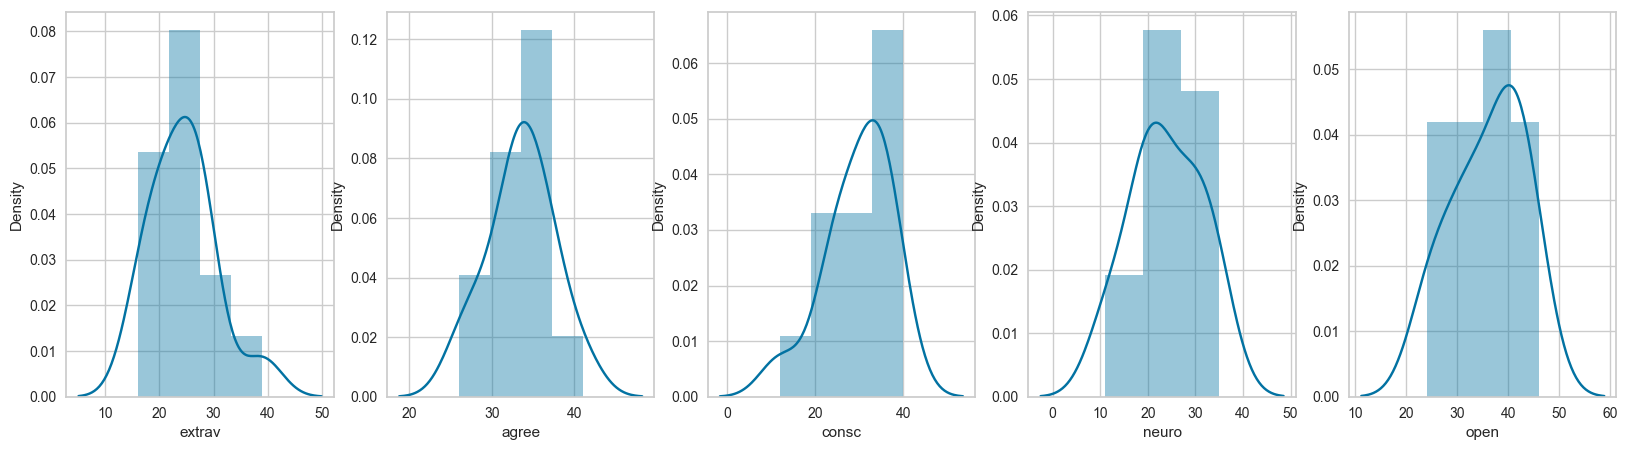

In [9]:
# plot the distribution of scores for each personality trait
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
sns.distplot(scores['extrav'], ax=axes[0])
sns.distplot(scores['agree'], ax=axes[1])
sns.distplot(scores['consc'], ax=axes[2])
sns.distplot(scores['neuro'], ax=axes[3])
sns.distplot(scores['open'], ax=axes[4])


In [14]:
# plot the extraversion score for each participant 
fig = px.histogram(scores, x="pid", y='extrav', nbins=20)
fig.show()


In [8]:
# rename the columns in extrav sequnetially
extrav = extrav.rename(columns={x:y for x,y in zip(extrav.columns,range(1,len(extrav.columns)))})
# rename columns in extrav by adding 'ext_' to the column name that have numbers
extrav = extrav.rename(columns={x:'ext_'+str(x) for x in extrav.columns if x != 'pid'})

# rename the columns in agree sequnetially
agree = agree.rename(columns={x:y for x,y in zip(agree.columns,range(1,len(agree.columns)))})
# rename columns in agree by adding 'agr_' to the column name that have numbers
agree = agree.rename(columns={x:'agr_'+str(x) for x in agree.columns if x != 'pid'})

# rename the columns in consc sequnetially
consc = consc.rename(columns={x:y for x,y in zip(consc.columns,range(1,len(consc.columns)))})
# rename columns in consc by adding 'con_' to the column name that have numbers
consc = consc.rename(columns={x:'con_'+str(x) for x in consc.columns if x != 'pid'})

# rename the columns in neuro sequnetially
neuro = neuro.rename(columns={x:y for x,y in zip(neuro.columns,range(1,len(neuro.columns)))})
# rename columns in neuro by adding 'neu_' to the column name that have numbers
neuro = neuro.rename(columns={x:'neu_'+str(x) for x in neuro.columns if x != 'pid'})

# rename the columns in open sequnetially
open = open.rename(columns={x:y for x,y in zip(open.columns,range(1,len(open.columns)))})
# rename columns in open by adding 'ope_' to the column name that have numbers
open = open.rename(columns={x:'ope_'+str(x) for x in open.columns if x != 'pid'})


In [10]:
# create a new dataframe named bfi by merging extrav, agree, consc, neuro, open
df = pd.merge(extrav, agree, on='pid')
df = pd.merge(df, consc, on='pid')
df = pd.merge(df, neuro, on='pid')
df = pd.merge(df, open, on='pid')
df.head()

,ext_1,ext_2,ext_3,ext_4,ext_5,ext_6,ext_7,ext_8,pid,agr_1,...,ope_1,ope_2,ope_3,ope_4,ope_5,ope_6,ope_7,ope_8,ope_9,ope_10
0,5,5,5,5,5,5,5,4,edr,5,...,5,5,4,5,5,4,3,4,5,3
1,4,1,3,4,1,3,1,2,egl,3,...,5,5,5,5,5,5,3,5,4,4
2,1,2,3,3,2,4,3,4,uja,3,...,3,4,3,2,3,2,4,3,3,2
3,2,2,2,2,2,2,2,2,lpz,4,...,3,3,4,3,3,4,2,4,3,3
4,3,2,4,5,1,5,1,5,j02,3,...,4,4,5,5,4,4,2,5,2,5


In [11]:
# drop the column 'pid' in df
df = df.drop('pid', axis=1)
columns = list(df.columns)


In [12]:
# remove pid colu
scaler = MinMaxScaler(feature_range=(0,1))
scaled_bfi = scaler.fit_transform(df)
df.head()

,ext_1,ext_2,ext_3,ext_4,ext_5,ext_6,ext_7,ext_8,agr_1,agr_2,...,ope_1,ope_2,ope_3,ope_4,ope_5,ope_6,ope_7,ope_8,ope_9,ope_10
0,5,5,5,5,5,5,5,4,5,5,...,5,5,4,5,5,4,3,4,5,3
1,4,1,3,4,1,3,1,2,3,5,...,5,5,5,5,5,5,3,5,4,4
2,1,2,3,3,2,4,3,4,3,4,...,3,4,3,2,3,2,4,3,3,2
3,2,2,2,2,2,2,2,2,4,4,...,3,3,4,3,3,4,2,4,3,3
4,3,2,4,5,1,5,1,5,3,4,...,4,4,5,5,4,4,2,5,2,5


/Users/beatriceli/miniconda3/envs/wellbeing/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/beatriceli/miniconda3/envs/wellbeing/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/beatriceli/miniconda3/envs/wellbeing/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/beatriceli/miniconda3/envs/wellbeing/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

KElbowVisualizer(ax=<AxesSubplot: >, estimator=KMeans(n_clusters=11), k=(2, 12))

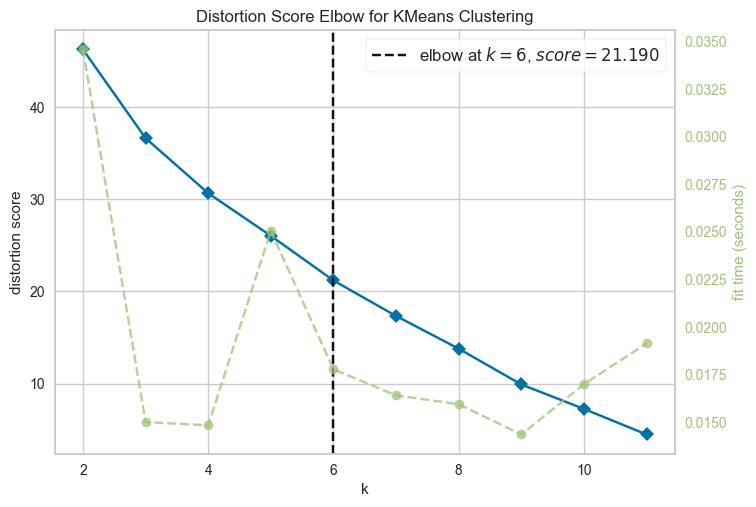

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,12))
visualizer.fit(scaled_bfi)
visualizer.show()

/Users/beatriceli/miniconda3/envs/wellbeing/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/beatriceli/miniconda3/envs/wellbeing/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/beatriceli/miniconda3/envs/wellbeing/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/beatriceli/miniconda3/envs/wellbeing/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

KElbowVisualizer(ax=<AxesSubplot: >,
                 estimator=KMeans(n_clusters=7, random_state=123), k=(2, 8),
                 metric='silhouette', timings=False)

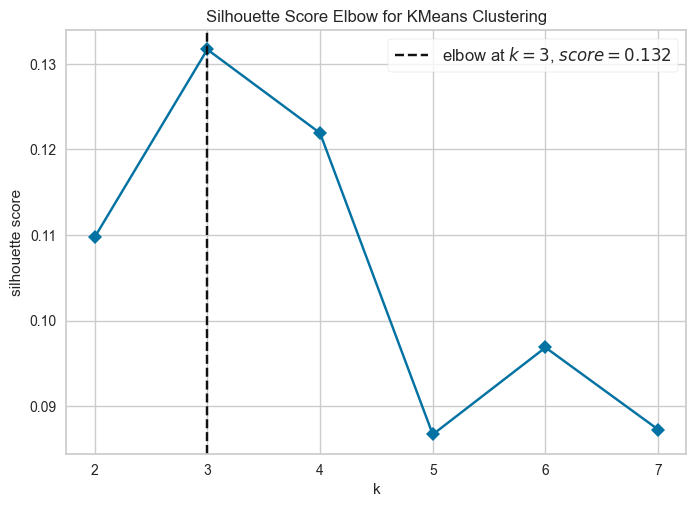

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [14]:
model = KMeans(random_state=123)
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,8), metric='silhouette', timings=False)
# Fit the data and visualize
visualizer.fit(scaled_bfi)    
visualizer.show()

In [15]:
# drop pid column from df and create a new dataframe named df_model
df_model = df

# define 3 clusters and fit my model
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(df_model)

/Users/beatriceli/miniconda3/envs/wellbeing/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,ext_1,ext_2,ext_3,ext_4,ext_5,...,ope_7,ope_8,ope_9,ope_10,Clusters
0,5,5,5,5,5,...,3,4,5,3,1
1,4,1,3,4,1,...,3,5,4,4,2
2,1,2,3,3,2,...,4,3,3,2,0
3,2,2,2,2,2,...,2,4,3,3,2
4,3,2,4,5,1,...,2,5,2,5,2


In [17]:
df_model.Clusters.value_counts()

0    5
1    4
2    4
Name: Clusters, dtype: int64

In [18]:
df_model.groupby('Clusters').mean()

,ext_1,ext_2,ext_3,ext_4,ext_5,...,ope_6,ope_7,ope_8,ope_9,ope_10
Clusters,,,,,,,,,,,
0,2.80,3.2,3.20,2.20,2.8,...,2.80,3.40,3.20,2.40,2.00
1,3.25,3.5,4.25,4.25,3.5,...,4.00,3.00,4.25,3.75,2.25
2,2.75,1.5,2.75,3.50,1.5,...,4.25,2.25,4.50,3.50,4.25


In [19]:
col_list = list(df_model.columns)
# get columns that start with ext_ from col_list
ext = [x for x in col_list if x.startswith('ext_')]
# get columns that start with agr_ from col_list
agr = [x for x in col_list if x.startswith('agr_')]
# get columns that start with con_ from col_list
con = [x for x in col_list if x.startswith('con_')]
# get columns that start with neu_ from col_list
neu = [x for x in col_list if x.startswith('neu_')]
# get columns that start with ope_ from col_list
ope = [x for x in col_list if x.startswith('ope_')]

data_sums = pd.DataFrame()
# data_sums['extroversion'] = df_model[ext].sum(axis=1)/len(df_model[ext])
# data_sums['agreeableness'] = df_model[agr].sum(axis=1)/len(df_model[agr])
# data_sums['conscientiousness'] = df_model[con].sum(axis=1)/len(df_model[con])
# data_sums['neuroticism'] = df_model[neu].sum(axis=1)/len(df_model[neu])
# data_sums['openness'] = df_model[ope].sum(axis=1)/len(df_model[ope])

data_sums['extroversion'] = df_model[ext].sum(axis=1)
data_sums['agreeableness'] = df_model[agr].sum(axis=1)
data_sums['conscientiousness'] = df_model[con].sum(axis=1)
data_sums['neuroticism'] = df_model[neu].sum(axis=1)
data_sums['openness'] = df_model[ope].sum(axis=1)
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,agreeableness,conscientiousness,neuroticism,openness
clusters,,,,,
0,24.2,30.60,24.60,25.00,30.40
1,29.5,36.25,36.25,16.00,39.75
2,19.5,34.50,30.00,30.25,39.50


<AxesSubplot: xlabel='clusters'>

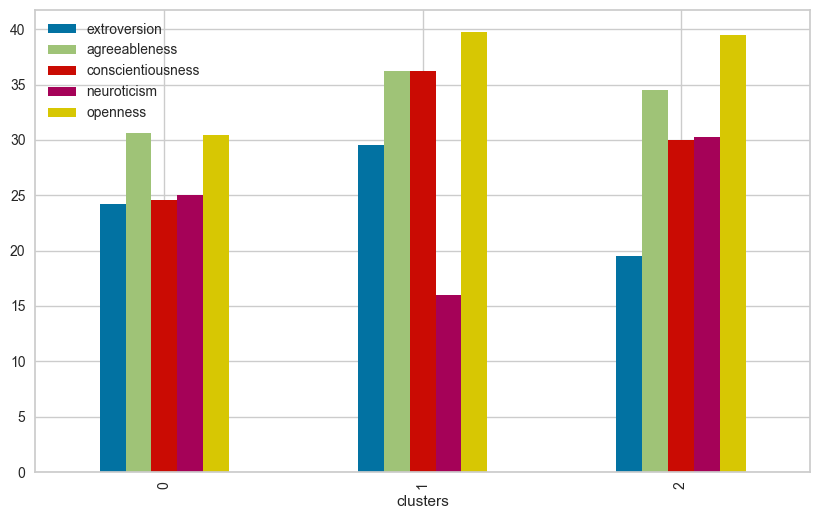

In [20]:
#  visualizing the means for each cluster
data_sums.groupby('clusters').mean().plot(kind='bar', figsize=(10,6))

In [23]:
#  visualize clusters in 2D graph with PCA
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)
df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,7.631737,-0.976207,1
1,-2.395004,-4.917086,2
2,0.519350,2.250607,0
3,-2.826317,1.184721,2
4,-4.488938,-3.893743,2


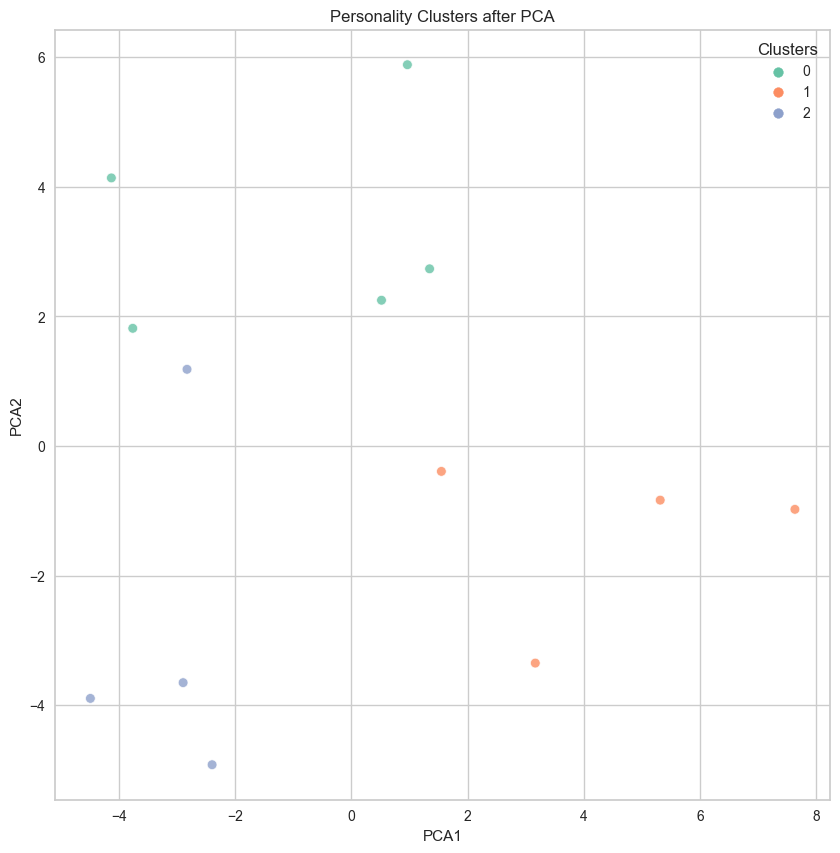

In [24]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

In [25]:
df_model.head()
# scale data_sums to be between 0 and 1 except for clusters
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_sums = scaler.fit_transform(data_sums.drop('clusters', axis=1))
scaled_data_sums = pd.DataFrame(scaled_data_sums, columns=data_sums.columns[:-1])
scaled_data_sums['clusters'] = data_sums['clusters']
scaled_data_sums.head()

,ext_1,ext_2,ext_3,ext_4,ext_5,...,ope_7,ope_8,ope_9,ope_10,Clusters
0,5,5,5,5,5,...,3,4,5,3,1
1,4,1,3,4,1,...,3,5,4,4,2
2,1,2,3,3,2,...,4,3,3,2,0
3,2,2,2,2,2,...,2,4,3,3,2
4,3,2,4,5,1,...,2,5,2,5,2


,extroversion,agreeableness,conscientiousness,neuroticism,openness,clusters
0,1.000000,1.000000,0.785714,0.000000,0.863636,1
1,0.130435,0.733333,0.750000,0.791667,1.000000,2
2,0.260870,0.400000,0.714286,0.416667,0.227273,0
3,0.000000,0.266667,0.464286,0.625000,0.363636,2
4,0.434783,0.733333,0.464286,0.958333,0.727273,2


In [26]:
categories = scaled_data_sums.columns[:-1]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=list(scaled_data_sums[scaled_data_sums['clusters'] == 0].mean()),
      theta=categories,
      fill='toself',
      name='Cluster 0'
))
fig.add_trace(go.Scatterpolar(
      r=list(scaled_data_sums[scaled_data_sums['clusters'] == 1].mean()),
      theta=categories,
      fill='toself',
      name='Cluster 1'  
))
fig.add_trace(go.Scatterpolar(
      r=list(scaled_data_sums[scaled_data_sums['clusters'] == 2].mean()),
      theta=categories,
      fill='toself',
      name='Cluster 2'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False
)

fig.show()

<AxesSubplot: xlabel='clusters'>

array([[<AxesSubplot: title={'center': 'agreeableness'}, xlabel='[clusters]'>,
        <AxesSubplot: title={'center': 'conscientiousness'}, xlabel='[clusters]'>],
       [<AxesSubplot: title={'center': 'extroversion'}, xlabel='[clusters]'>,
        <AxesSubplot: title={'center': 'neuroticism'}, xlabel='[clusters]'>],
       [<AxesSubplot: title={'center': 'openness'}, xlabel='[clusters]'>,
        <AxesSubplot: >]], dtype=object)

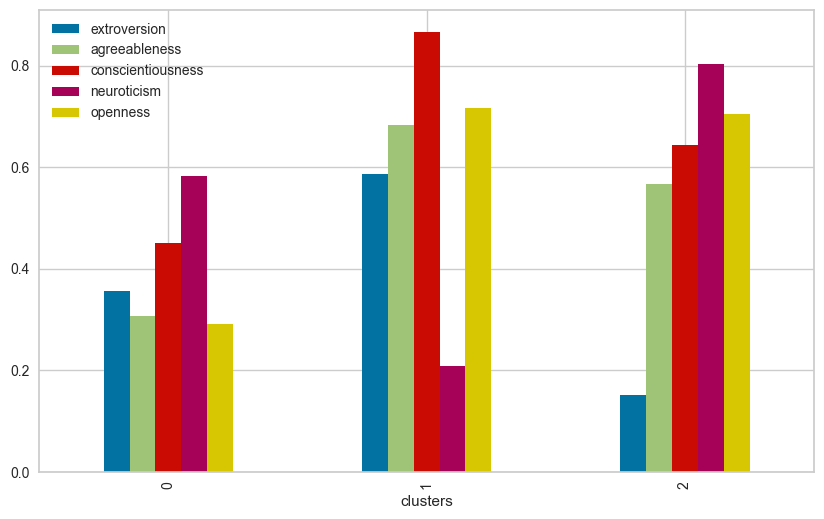

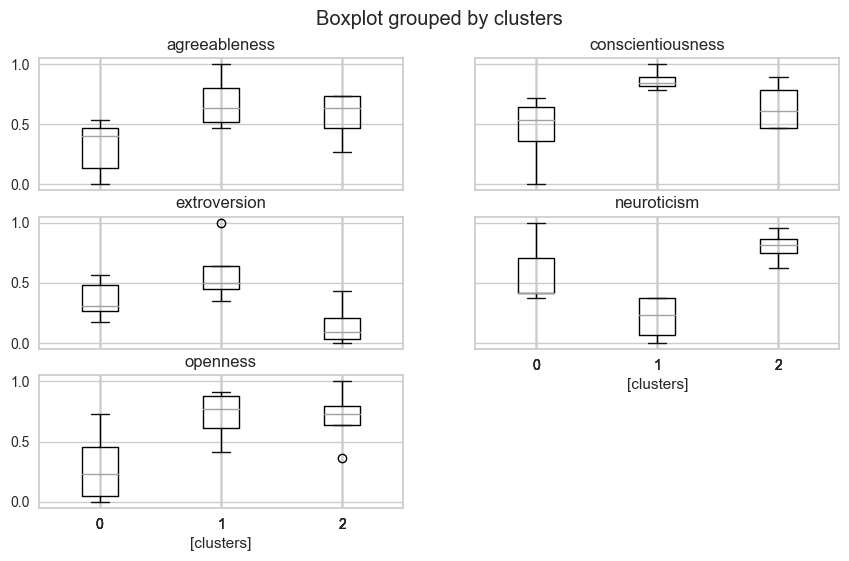

In [27]:
#  visualizing the means for each cluster from scaled_data_sums
scaled_data_sums.groupby('clusters').mean().plot(kind='bar', figsize=(10,6))

#  visualizing the boxplots for each cluster from scaled_data_sums
scaled_data_sums.boxplot(by='clusters', figsize=(10,6))


In [ ]:
# plot extraversion score for each participant
plt.figure(figsize=(10,6))
sns.boxplot(data=df_model, x='Clusters', y='extroversion')
plt.title('Extraversion Score for Each Cluster');
